## Test 1.1 Visualising location.
In this visualtisation a comparison is made between saved gps positions between Motorola and Sony. The phones are used at the same time and at the same four locations.

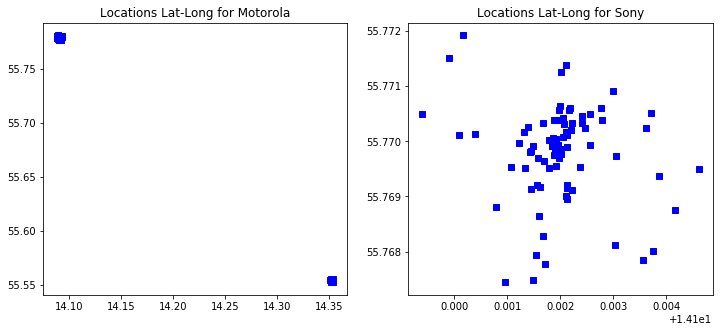

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.spatial.distance
dataSet1 = pd.read_csv("ehaBtfOPDNZjzy1MEvjQmGo4Zv12_teach_location.csv")
dataSet2 = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_location.csv")

trainingData1 = np.array(dataSet1)
trainingData2 = np.array(dataSet2)
plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1, 2, 1)
plt.title("Locations Lat-Long for Motorola")
plt.plot(trainingData1[:,1],trainingData1[:,2],'bs')
#plt.rcParams["figure.figsize"] = (10,10)
plt.subplot(1, 2, 2)
plt.title("Locations Lat-Long for Sony")
plt.plot(trainingData2[:,1],trainingData2[:,2],'bs')
#plt.rcParams["figure.figsize"] = (20,10)
plt.show()

## Comparing training results for geohash and lat long.
Teaching data collected by walking between Anna Lindhs Plats and Öresundsvägen and passing the stations Universitetet and Tekniska museet.
Teaching was done using these four stations and expectation was that for all stations a different journey should show up. The result was not as expected and the journeys did not change as expected. First journey was correct second stayed to long until it changed to the third journey. The last one did not show up.
Teaching data in: tnK534JMwwfhvUEycn69HPbhqkt2_teach_location_1_4.csv
The file also contains teaching data for Lund the interesting rows for this test in Malmö is row  800-1000.
Rows are created using 100m around station location.
In the first graph the trained positions are shown. The two clusters in the upper right corner has to 
Learning using lat-long is then compares.

Result training on server:
epoch     train_loss  valid_loss  accuracy
1         1.585488    1.764136    0.030000  
2         1.234845    1.126102    0.820000  
3         0.903974    0.499294    0.850000  
4         0.696824    0.360641    0.850000  
5         0.571501    0.314641    0.880000  
6         0.486392    0.298709    0.890000

Test results.


(200, 11)
55.602337515077544
55.60973989067175


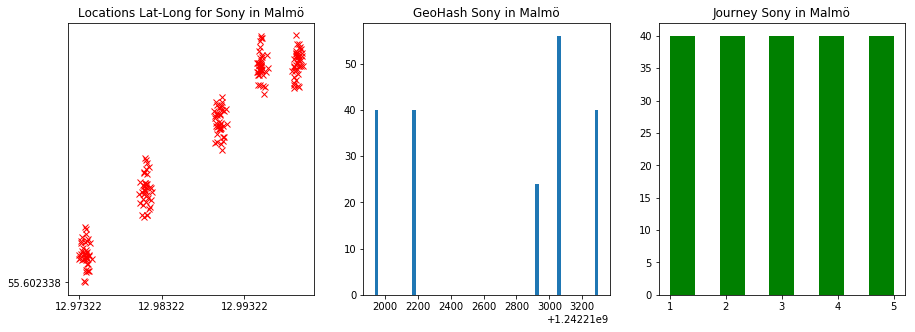

In [55]:
#### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.spatial.distance
dataSet = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_location_1_4.csv")
dataSet1 = dataSet.iloc[800:]  #Malmö
#dataSet1 = dataSet.iloc[800:840]  #Malmö
#dataSet1 = dataSet.iloc[840:880]  #Malmö
#dataSet1 = dataSet.iloc[880:920]  #Malmö
#dataSet1 = dataSet1.iloc[440:480]  #Select rows  /Blåtunga o Linegården
#dataSet1=dataSet1.loc[(dataSet1['journey'] == 8180281120) | (dataSet1['journey'] == 8112081802)]
print(dataSet1.shape)
trainingData1 = np.array(dataSet1)
plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1,3,1)

plt.title("Locations Lat-Long for Sony in Malmö")
plt.plot(trainingData1[:,1],trainingData1[:,2],'x',color='red')
print(trainingData1[:,2].min())
print(trainingData1[:,2].max())
plt.xticks(np.arange(trainingData1[:,1].min(), trainingData1[:,1].max(), step=0.01))
plt.yticks(np.arange(trainingData1[:,2].min(), trainingData1[:,2].max(), step=0.01))
plt.subplot(1,3,2)
plt.title("GeoHash Sony in Malmö")
plt.hist(trainingData1[:,3],60)
plt.subplot(1,3,3)
plt.title("Journey Sony in Malmö")
journey = dataSet1['journey']
journey = journey.replace(8000080002,1)
journey = journey.replace(8000280071,2)
journey = journey.replace(8007180022,3)
journey = journey.replace(8002280158,4)
journey = journey.replace(8015880000,5)
plt.hist(journey,9,color='green')
plt.show()

epoch,train_loss,valid_loss,accuracy
1,1.284616,1.498768,0.760000
2,0.873496,0.811245,1.000000
3,0.578622,0.221747,1.000000
4,0.396086,0.079577,1.000000
5,0.281936,0.024214,1.000000
6,0.211723,0.033110,1.000000
7,0.166220,0.019938,1.000000
8,0.129702,0.013716,1.000000
9,0.101997,0.011766,1.000000
10,0.080994,0.011491,1.000000


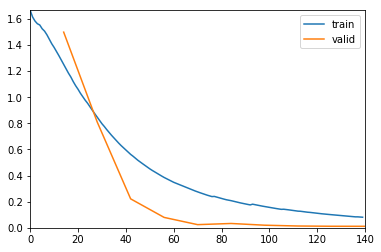

CPU times: user 6.53 s, sys: 5.7 s, total: 12.2 s
Wall time: 13.7 s


In [3]:
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *
sys.path.append("../../code") # go to parent dir
from commuter import *
dataSet = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_location_1_4.csv")
dataSet = dataSet.iloc[800:] #Malmö
dataSet = dataSet.sample(frac=1).reset_index(drop=True) #Shuffle
dataSet= make_shure_we_got_enough_rows(dataSet)
dataSet_used = dataSet[['longitude','latitude','journey']]
cont_names =['longitude','latitude']
valid_idx = list(np.random.randint(0,len(dataSet_used),int(len(dataSet_used)*0.1)))
data = (TabularList.from_df(dataSet_used,cont_names=cont_names,cat_names=None, procs=[FillMissing, Categorify, Normalize])
    .split_by_idx(valid_idx)
    .label_from_df(cols='journey')
    .databunch())
learner=tabular_learner(data, layers=[200,100],metrics=accuracy,callback_fns=ShowGraph)
%time learner.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy
1,1.404192,1.598472,0.220000
2,1.058907,1.383902,0.370000
3,0.836957,0.923766,0.910000
4,0.664765,0.596287,0.910000
5,0.536102,0.372780,0.910000
6,0.461715,0.279154,0.910000
7,0.403614,0.255553,0.910000
8,0.360433,0.249747,0.910000
9,0.323229,0.249148,0.910000
10,0.294537,0.242351,0.910000


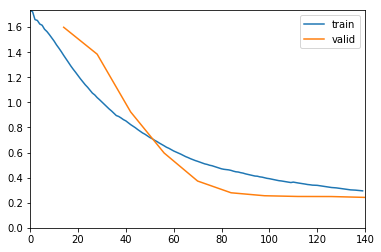

CPU times: user 6.57 s, sys: 5.74 s, total: 12.3 s
Wall time: 13.7 s


In [2]:
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *
sys.path.append("../../code") # go to parent dir
from commuter import *
dataSet = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_location_1_4.csv")
dataSet = dataSet.iloc[800:] #Malmö
dataSet = dataSet.sample(frac=1).reset_index(drop=True)
dataSet= make_shure_we_got_enough_rows(dataSet)
dataSet_used = dataSet[['geoHash','journey']]
cont_names =['geoHash']
valid_idx = list(np.random.randint(0,len(dataSet_used),int(len(dataSet_used)*0.1)))
data = (TabularList.from_df(dataSet_used,cont_names=cont_names,cat_names=None, procs=[FillMissing, Categorify, Normalize])
    .split_by_idx(valid_idx)
    .label_from_df(cols='journey')
    .databunch())
learner=tabular_learner(data, layers=[200,100],metrics=accuracy,callback_fns=ShowGraph)
%time learner.fit_one_cycle(10)

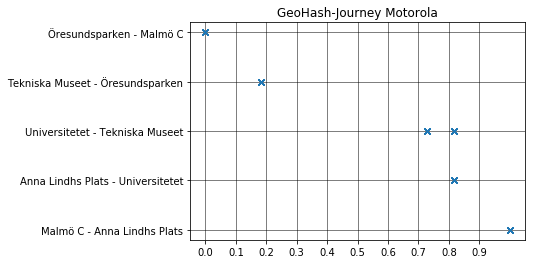

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.spatial.distance
dataSet = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_location_1_4.csv")
dataSet = dataSet.iloc[800:]  #Malmö
#dataSet=dataSet.loc[(dataSet['journey'] == 8007180022) | (dataSet['journey'] == 8000280071)]
journey = dataSet[['journey']]
trainingData = np.array(dataSet)
geoHash = (trainingData[:,3] - trainingData[:,3].min())/ (trainingData[:,3].max()- trainingData[:,3].min()) 
plt.title("GeoHash-Journey Motorola")
journey = dataSet['journey'].astype(str)
journey = journey.replace("8000080002","Malmö C - Anna Lindhs Plats")
journey = journey.str.replace("8000280071","Anna Lindhs Plats - Universitetet")
journey = journey.str.replace("8007180022","Universitetet - Tekniska Museet")
journey = journey.replace("8002280158","Tekniska Museet - Öresundsparken")
journey = journey.replace("8015880000","Öresundsparken - Malmö C")
journey = journey.str.replace("9004291069","Kristianstad C-Simrishamn Station")

plt.plot(geoHash,journey,'x')
plt.xticks(np.arange(0, 1, step=0.1))
#plt.rcParams["figure.figsize"] = (20,10)
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [26]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')
%matplotlib inline
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
plt.show()

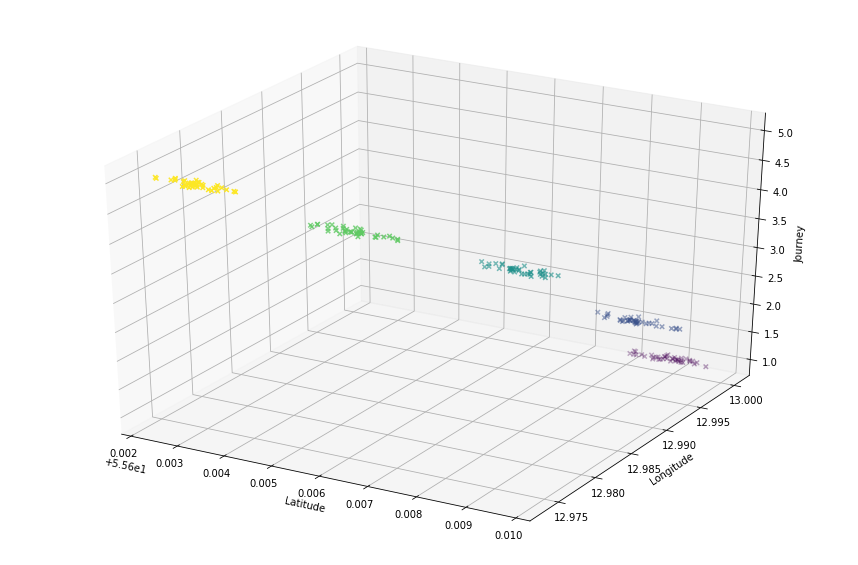

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.spatial.distance
plt.rcParams["figure.figsize"] = (15,10)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.figsize = (5,5)
dataSet = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_location_1_4.csv")
dataSet = dataSet.iloc[800:]  #Malmö
journey = dataSet['journey']
journey = journey.replace(8000080002,1)
journey = journey.replace(8000280071,2)
journey = journey.replace(8007180022,3)
journey = journey.replace(8002280158,4)
journey = journey.replace(8015880000,5)
latitude = dataSet[['latitude']]
longitude = dataSet[['longitude']]
trainingData = np.array(dataSet)
c=['r','o','b','o','b']
ax.scatter(latitude, longitude, journey, c=journey, marker='x')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Journey')
plt.show()


Distribution around a departure station.
Added rows for all distances fro, 0 to 1000m
Needs a map to be verified correctely.......

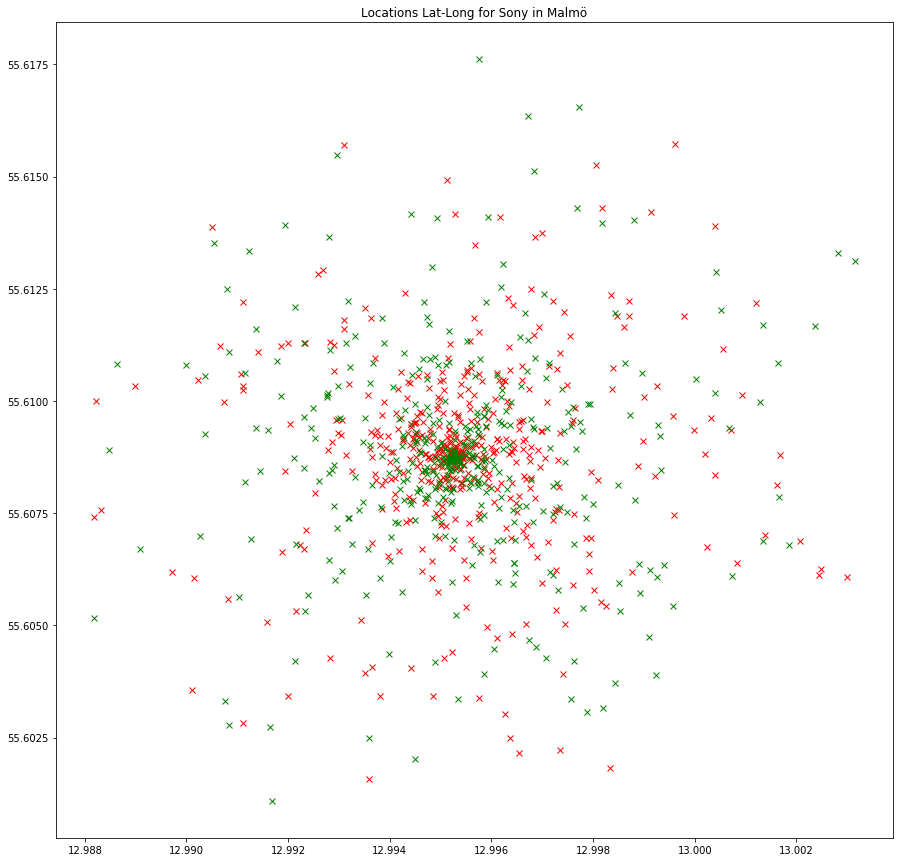

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
dataSet = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_station_dist.csv")
dataSet2 = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_your_loc_dist.csv")
#dataSet = dataSet.iloc[0:80] 
#dataSet2 = dataSet2.iloc[0:160] 
trainingData = np.array(dataSet)
trainingData2 = np.array(dataSet2)
plt.rcParams["figure.figsize"] = (15,15)
plt.title("Locations Lat-Long for Sony in Malmö")
plt.plot(trainingData[:,1],trainingData[:,2],'x',color='red')
plt.plot(trainingData2[:,1],trainingData2[:,2],'x',color='green')
plt.show()

8007180022    40
8002280071    40
8000280071    40
Name: journey, dtype: int64


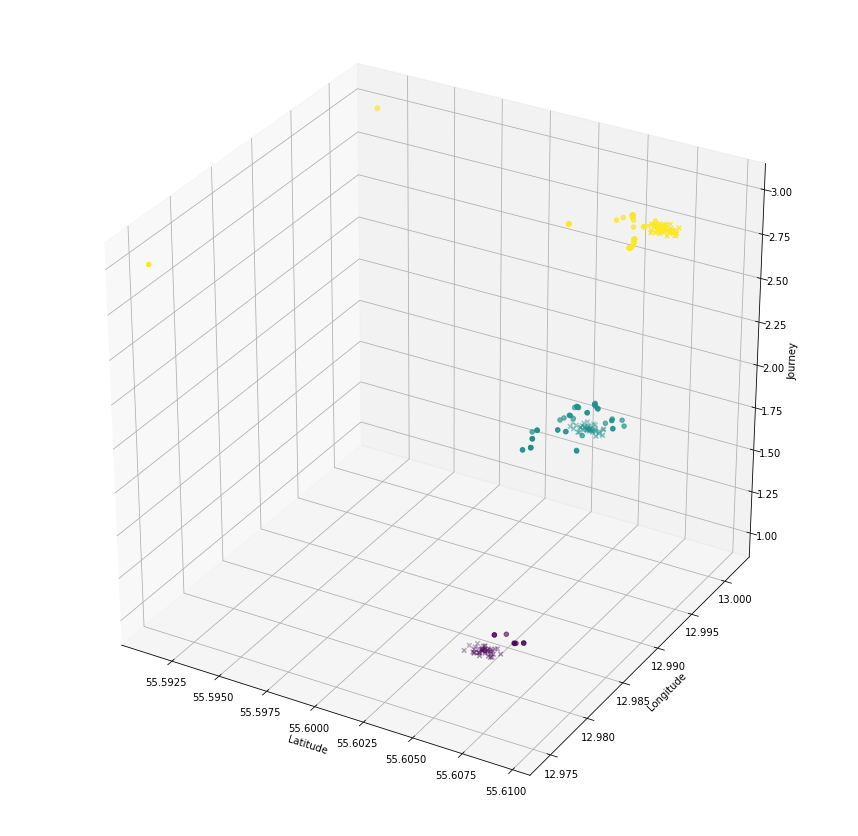

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.spatial.distance
plt.rcParams["figure.figsize"] = (15,15)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.figsize = (5,5)
dataSet = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_teach_all_1.csv")
#dataSet = dataSet.iloc[800:]  #Malmö
journey = dataSet['journey']
hepp=journey.value_counts()
print(hepp)

journey = journey.replace(8002280071,1)
journey = journey.replace(8007180022,2)
journey = journey.replace(8000280071,3)
latitude = dataSet[['latitude']]
longitude = dataSet[['longitude']]
trainingData = np.array(dataSet)
c=['r','o','b']
ax.scatter(latitude, longitude, journey, c=journey, marker='x')
#Predictions set
dataSetPredicted = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_predict_all_1.csv")
journeyPredicted = dataSetPredicted['predictedjourney']
journeyPredicted = journeyPredicted.replace(8002280071,1)
journeyPredicted = journeyPredicted.replace(8007180022,2)
journeyPredicted = journeyPredicted.replace(8000280071,3)
latitudePredicted = dataSetPredicted[['latitude']]
longitudePredicted = dataSetPredicted[['longitude']]
ax.scatter(latitudePredicted, longitudePredicted, journeyPredicted, c=journeyPredicted, marker='o')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Journey')
plt.show()

8007180022    55
8000280071    48
8002280071     8
Name: predictedjourney, dtype: int64


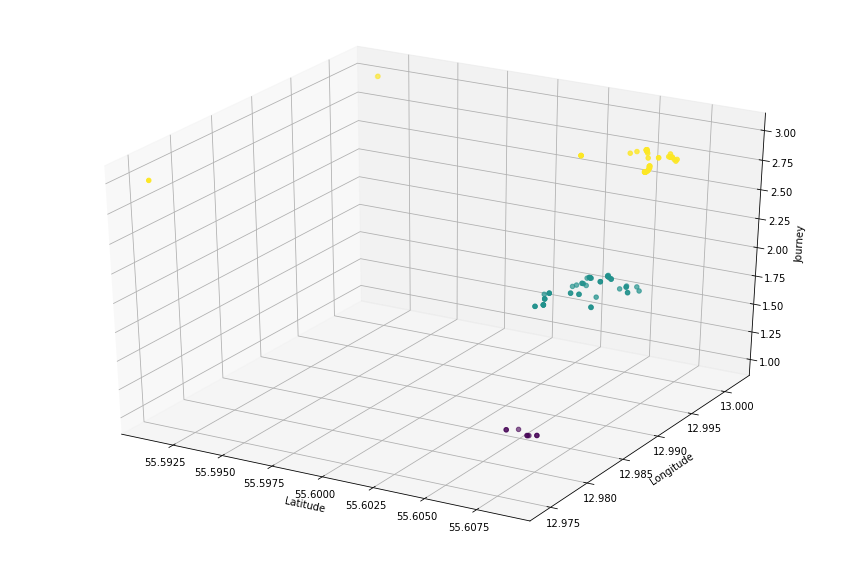

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.spatial.distance
plt.rcParams["figure.figsize"] = (15,10)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.figsize = (5,5)
#dataSet = dataSet.iloc[800:]  #Malmö
#journeyPredicted = dataSetPredicted['predictedjourney']
#hepp=journeyPredicted.value_counts()
#print(hepp)
dataSetPredicted = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_predict_all_1.csv")
journeyPredicted = dataSetPredicted['predictedjourney']
journeyPredicted = journeyPredicted.replace(8002280071,1)
journeyPredicted = journeyPredicted.replace(8007180022,2)
journeyPredicted = journeyPredicted.replace(8000280071,3)
latitudePredicted = dataSetPredicted[['latitude']]
longitudePredicted = dataSetPredicted[['longitude']]
ax.scatter(latitudePredicted, longitudePredicted, journeyPredicted, c=journeyPredicted, marker='o')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Journey')
plt.show()

['green', 'green', 'blue', 'blue', 'green', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'blue', 'green', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green']


TypeError: unsupported operand type(s) for /: 'str' and 'float'

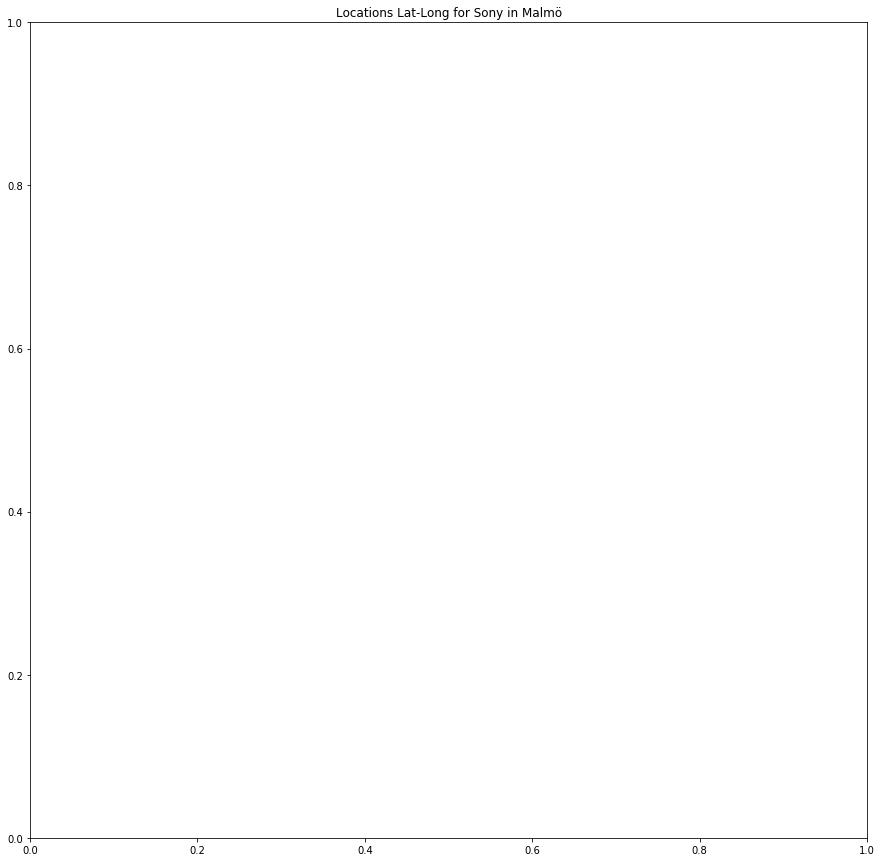

In [59]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.spatial.distance
plt.title("Locations Lat-Long for Sony in Malmö")
dataSetPredicted = pd.read_csv("tnK534JMwwfhvUEycn69HPbhqkt2_predict_all_1.csv")
colors = dataSetPredicted['predictedjourney'].astype(str)
#col_type = dataSetPredicted.iloc[1:,0]
#col_type = col_type.astype(str)
#col_type = col_type.replace('3','r')
#col.shape
#print(col_type)
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='8002280071':
            cols.append('red')
        elif l=='8007180022':
            cols.append('blue')
        else:
            cols.append('green')
    return cols
# Create the colors list using the function above
cols=pltcolor(colors)
print(cols)
color = [str(item/255.) for item in colors]
#colors = colors.astype(str)
#colors = colors.replace('8002280071','r')
#colors = colors.replace('8007180022','b')
#colors = colors.replace('8000280071','y')
#colors = colors.astype(str)
#col = df['type'].map({'ha':'r', 'of':'b', 'cu':'y'})
#hepp=colors.value_counts()
#print(colors)
plt.plot(dataSetPredicted["latitude"],dataSetPredicted["longitude"],'x',c=color)
plt.show()